### 機械学習の流れ
1. データを用意する
2. 「訓練データ」と「テストデータ」に分割する
3. 訓練データで学習を行う
4. 学習後のモデルでテストデータに適用して，精度を算出する
5. 結果を可視化する
    - 前回は1〜3について行った，今回は4〜5を行う 

In [2]:
# 機械学習の流れ3: 機械学習の実行
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import svm

import pandas as pd

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を300
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# ステップ2
# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ステップ3
# SVMの実行

# サポートベクターマシンモデルを作成する
model = svm.SVC()

# 訓練データを渡して，SVMの学習を行う
model.fit(X_train, y_train) # これが実行されると訓練データから機械学習を行う

SVC()

### 学習後のモデルをテストデータに適用
- ```model.fit(X_train, y_train)``` を行った後に，```model.predict(テストデータ用特徴量)```を行うと，テストデータに対する目的変数の予測が行われる
- 「テストデータ用目的変数」と「予測されたテストデータに対する目的変数」を比較することで，精度を算出できる

In [3]:
# 機械学習の流れ4（ステップ1）: 予測を行う
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import svm

import pandas as pd

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を300
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# ステップ2
# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ステップ3
# SVMの実行

# サポートベクターマシンモデルを作成する
model = svm.SVC()

# 訓練データを渡して，SVMの学習を行う
model.fit(X_train, y_train) # これが実行されると訓練データから機械学習を行う

# ステップ4
# 学習後のモデルに対して，特徴量テストデータを適用する
y_pred = model.predict(X_test)

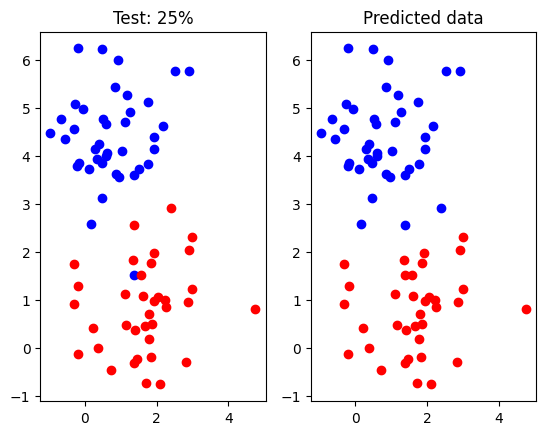

In [4]:
# 機械学習の流れ4（ステップ2）: 「テストデータ用目的変数」と「予測されたテストデータに対する目的変数」を可視化
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import svm

import pandas as pd
import matplotlib.pyplot as plt

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を300
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# ステップ2
# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ステップ3
# SVMの実行

# サポートベクターマシンモデルを作成する
model = svm.SVC()

# 訓練データを渡して，SVMの学習を行う
model.fit(X_train, y_train) # これが実行されると訓練データから機械学習を行う

# ステップ4
# 学習後のモデルに対して，特徴量テストデータを適用する
y_pred = model.predict(X_test)

# テストデータ用目的変数の可視化
plt.subplot(121)
# テストデータをデータフレーム(pandas)に落とし込む
test_data = pd.DataFrame(X_test)
test_data['target'] = y_test

# 目標数でデータを分ける
test_data1 = test_data[test_data['target'] == 0]
test_data2 = test_data[test_data['target'] == 1]

# 可視化を行う
plt.scatter(test_data1[0], test_data1[1], color='b')
plt.scatter(test_data2[0], test_data2[1], color='r')
plt.title('Test: 25%')

# 予測されたテストデータに対する目的変数の可視化
plt.subplot(122)
# テストデータをデータフレーム(pandas)に落とし込み，予測されたデータを追加する
pred_data = pd.DataFrame(X_test)
pred_data['target'] = y_pred # ここを変更する

# 目標数でデータを分ける
pred_data1 = pred_data[pred_data['target'] == 0]
pred_data2 = pred_data[pred_data['target'] == 1]

# 可視化を行う
plt.scatter(pred_data1[0], pred_data1[1], color='b')
plt.scatter(pred_data2[0], pred_data2[1], color='r')
plt.title('Predicted data')

plt.show()

- 「テストデータ用目的変数」と「予測されたテストデータに対する目的変数」を可視化することで，違うことが確認できる．（精度が100%でないことがわかる）

### 正答率の算出
- ```from sklearn.metrics import accuracy_score``` と冒頭に書き，```accuracy_score(テストデータ用目的変数, 予測されたテストデータに対する目的変数)```と書けば，正答率を出すことができる
```python
# 具体例
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred)) # 正答率の表示
```

In [5]:
# 機械学習の流れ4（ステップ3）: 正答率を表示
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import pandas as pd

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を300
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# ステップ2
# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ステップ3
# SVMの実行

# サポートベクターマシンモデルを作成する
model = svm.SVC()

# 訓練データを渡して，SVMの学習を行う
model.fit(X_train, y_train) # これが実行されると訓練データから機械学習を行う

# ステップ4
# 学習後のモデルに対して，特徴量テストデータを適用する
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred) # 正答率を算出
print('正答率:', score * 100, '%') # 正答率の表示

正答率: 96.0 %


### 新規テストデータの予測
- 新しいテストデータを学習済みのモデルに渡すことで，その新規データに対する予測を得ることができる
- 今回の場合，2つの値を渡せば，モデルの推定を行うことができる
    - 2つの入力から，targetが0であるか，1であるかを推定する
- ```model.predict([新規テストデータ])``` とすることで，新規テストデータに対する予測結果を得ることができる

In [6]:
# データの確認
from sklearn.datasets import make_blobs
import pandas as pd

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を300
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

print(data.head())

          0         1  target
0  3.359415  5.248267       0
1  2.931100  0.782556       1
2  1.120314  5.758061       0
3  2.876853  0.902956       1
4  1.666088  5.605634       0


In [7]:
# 機械学習の流れ4（ステップ4）: 新規データに対する予測を表示
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import pandas as pd

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を300
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# ステップ2
# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ステップ3
# SVMの実行

# サポートベクターマシンモデルを作成する
model = svm.SVC()

# 訓練データを渡して，SVMの学習を行う
model.fit(X_train, y_train) # これが実行されると訓練データから機械学習を行う

# ステップ4
# 学習後のモデルに対して，特徴量テストデータを適用する
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred) # 正答率を算出
print('正答率:', score * 100, '%') # 正答率の表示

# ステップ5
# 新規データが[1, 3]の場合の結果を予測
pred = model.predict([[1, 3]]) # リストの入れ子になることに注意
print('[1, 3]の予測結果: ', pred)

# 新規データが[1, 2]の場合の結果を予測
pred = model.predict([[1, 2]]) # リストの入れ子になることに注意
print('[1, 2]の予測結果: ', pred)

正答率: 96.0 %
[1, 3]の予測結果:  [0]
[1, 2]の予測結果:  [1]


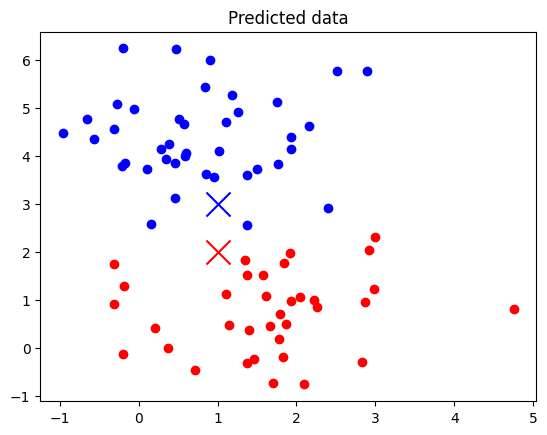

In [8]:
# 機械学習の流れ4（ステップ5）: 
# 予測されたテストデータに対する目的変数と新規データに対する予測の可視化 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import svm

import pandas as pd
import matplotlib.pyplot as plt

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を300
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# ステップ2
# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ステップ3
# SVMの実行

# サポートベクターマシンモデルを作成する
model = svm.SVC()

# 訓練データを渡して，SVMの学習を行う
model.fit(X_train, y_train) # これが実行されると訓練データから機械学習を行う

# ステップ4
# 学習後のモデルに対して，特徴量テストデータを適用する
y_pred = model.predict(X_test)

# ステップ5
# 予測の可視化

# テストデータをデータフレーム(pandas)に落とし込み，予測されたデータを追加する
pred_data = pd.DataFrame(X_test)
pred_data['target'] = y_pred # ここを変更する

# 目標数でデータを分ける
pred_data1 = pred_data[pred_data['target'] == 0]
pred_data2 = pred_data[pred_data['target'] == 1]

# 可視化を行う
plt.scatter(pred_data1[0], pred_data1[1], color='b')
plt.scatter(pred_data2[0], pred_data2[1], color='r')

# [1, 3]の予測結果: [0] なので，青で表示
# sはマーカーの大きさを指定，marker='x'とすることで×マークでplot
plt.scatter([1], [3], color='b', s=300, marker='x')

# [1, 2]の予測結果: [1] なので，赤で表示
# sはマーカーの大きさを指定，marker='x'とすることで×マークでplot
plt.scatter([1], [2], color='r', s=300, marker='x')

plt.title('Predicted data')

plt.show()

- 新しいテストデータを細かく分割して，学習済みモデルに適用することで，領域の可視化ができる

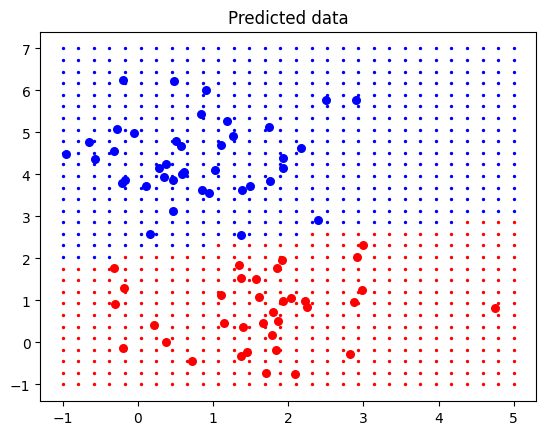

In [9]:
# 機械学習の流れ5（ステップ5）: 予測領域の可視化
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import svm

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0, # シードを0
    n_features=2,   # 特徴量を2次元
    centers=2,      # 目標を2つ（塊を2つ）
    cluster_std=1,  # データの標準偏差を1
    n_samples=300,  # データ数を300
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# ステップ2
# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# ステップ3
# SVMの実行

# サポートベクターマシンモデルを作成する
model = svm.SVC()

# 訓練データを渡して，SVMの学習を行う
model.fit(X_train, y_train) # これが実行されると訓練データから機械学習を行う

# ステップ4
# 学習後のモデルに対して，特徴量テストデータを適用する
y_pred = model.predict(X_test)

# ステップ5
# 予測の可視化

# テストデータをデータフレーム(pandas)に落とし込み，予測されたデータを追加する
pred_data = pd.DataFrame(X_test)
pred_data['target'] = y_pred # ここを変更する

# 目標数でデータを分ける
pred_data1 = pred_data[pred_data['target'] == 0]
pred_data2 = pred_data[pred_data['target'] == 1]

# 可視化を行う
plt.scatter(pred_data1[0], pred_data1[1], color='b', s=30)
plt.scatter(pred_data2[0], pred_data2[1], color='r', s=30)

# 細かくテストデータを分割し，それぞれ予測を行う
# 細かすぎると計算に時間がかかる
newData0 = np.linspace(-1, 5, 30) # 横軸の最小と最大を考慮
newData1 = np.linspace(-1, 7, 30) # 縦軸の最小と最大を考慮

for i in range(len(newData0)):
    for j in range(len(newData1)):
        pred = model.predict([[newData0[i], newData1[j]]])
        if pred[0] == 0:
            plt.scatter([newData0[i]], [newData1[j]], color='b', s=2, marker='o')
        else:
            plt.scatter([newData0[i]], [newData1[j]], color='r', s=2, marker='o')

plt.title('Predicted data')
plt.show()

- ここまで行うことで，機械学習が予測する領域を可視化できる

### 機械学習方法の紹介
1. 線形回帰（直線で関係式を表現する）
- 予測したい状況（数値データ: ```X```）を入力すると，予測結果（数値: ```y```）を出力する方法
- 訓練データとの誤差が小さくなるような直線を求める
    - 最小二乗法: 各誤差の二乗した値の合計値を最小化することで直線を求めることができる
        - 各誤差の総和の場合，プラスマイナスを打ち消すため，誤差を小さくする直線を求めることができない
- ```from sklearn.linear_model import LinearRegression``` と冒頭に書くことで，線形回帰モデルを利用できる
```python
# 使用例
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
```

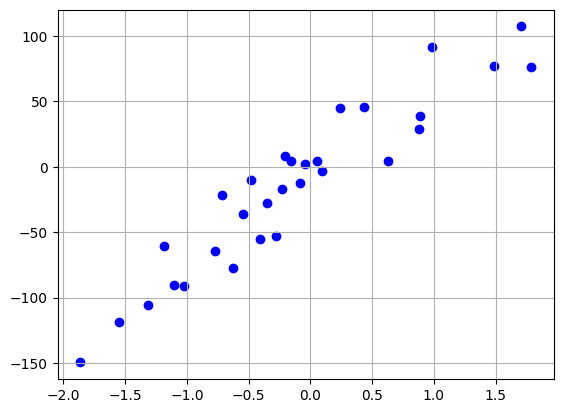

In [1]:
# ステップ1: 線形回帰用のデータを用意する
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt

# 線形回帰データの用意
X, y = make_regression(
    random_state=3,  # シードを3
    n_features=1,    # 特徴量1つ
    noise=20,        # ノイズの度合いを20
    n_samples=30,    # データ数を30
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 「特徴量0」と「y」で散布図プロット
plt.scatter(data[0], y, color='b')
plt.grid() # グリッド表示
plt.show()

In [2]:
# ステップ2: 用意したデータを訓練データとテストデータに分ける
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# 線形回帰データの用意
X, y = make_regression(
    random_state=3,  # シードを3
    n_features=1,    # 特徴量1つ
    noise=20,        # ノイズの度合いを20
    n_samples=30,    # データ数を30
)

# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [3]:
# ステップ3: 線形回帰モデルの学習を行う
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 線形回帰データの用意
X, y = make_regression(
    random_state=3,  # シードを3
    n_features=1,    # 特徴量1つ
    noise=20,        # ノイズの度合いを20
    n_samples=30,    # データ数を30
)

# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 線形回帰モデルを訓練データで学習する
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 回帰モデルの評価
- ```SVM```と同様に，テストデータに対する予測値を求める
- ```y_test```と予測値の関係から学習後のモデルを評価することができる
- ```from sklearn.metrics import mean_squared_error``` と冒頭に書くことで，平均二乗誤差 (MSE, Mean Squared Error) を求めることができる
    - ```mean_squared_error(y_test, 予測値)```と書くことで，```y_test```と予測値の平均二乗誤差を求めることができる
    - 平均二乗誤差は0に近づけば近づくほど，精度が高いモデルとなる
        - 言い換えると，この値が大きいほど誤差の多いモデルとなる

In [4]:
# ステップ4: 線形回帰モデルの学習の精度を求める
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 線形回帰データの用意
X, y = make_regression(
    random_state=3,  # シードを3
    n_features=1,    # 特徴量1つ
    noise=20,        # ノイズの度合いを20
    n_samples=30,    # データ数を30
)

# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 線形回帰モデルを訓練データで学習する
model = LinearRegression()
model.fit(X_train, y_train)

# 予測値を求める
y_pred = model.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print('平均二乗誤差の値: ', score) 

# ノイズの値が0に近づけば近づくほど，平均二乗誤差の値は小さくなる
# ノイズの値を大きくすると，平均二乗誤差の値は大きくなる ことを確認せよ

平均二乗誤差の値:  434.7418184233388


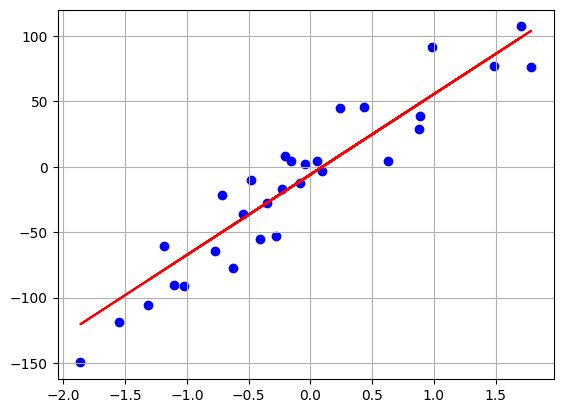

In [5]:
# ステップ5: 線形回帰モデルを可視化する
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# 線形回帰データの用意
X, y = make_regression(
    random_state=3,  # シードを3
    n_features=1,    # 特徴量1つ
    noise=20,        # ノイズの度合いを20
    n_samples=30,    # データ数を30
)

# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 線形回帰モデルを訓練データで学習する
model = LinearRegression()
model.fit(X_train, y_train)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 「特徴量0」と「y」で散布図プロット
plt.scatter(data[0], y, color='b')       # 全データの散布図
plt.plot(X, model.predict(X), color='r') # 全データの予測値を直線で表示
plt.grid() # グリッド表示
plt.show()

2. k-NN（k-近傍法）
- 近いものを仲間（同じグループに属している）と考えて，入力したデータから近いk個のデータを調べて，多数決でどのグループに属しているかを予測する方法
- ```from sklearn.neighbors import KNeighborsClassifier``` と冒頭に書くことで，k-NNモデルを利用できる
```python
# 使用例
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=k) # kを自然数で指定する
model.fit(X_train, y_train)
```
- あとはSVMと同じ方法で，正答率を求めることができ，新しいテストデータに対する予測を行うことができる

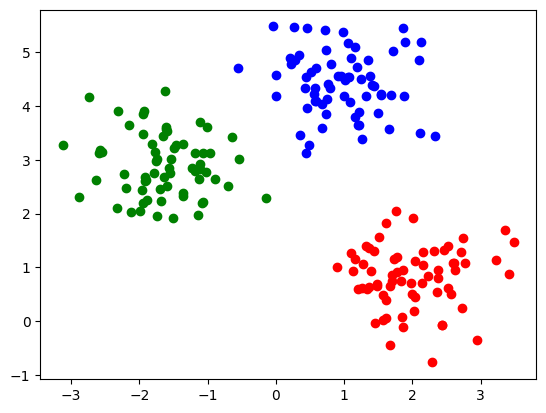

In [6]:
# k-NN用のデータを作成し，可視化する
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0,  # シードを0
    n_features=2,    # 特徴量を2次元
    centers=3,       # 目標を3つ（塊を3つ）
    cluster_std=0.6, # データの標準偏差を0.6
    n_samples=200,   # データ数を200
)

# 特徴量をデータフレーム(pandas)に落とし込む
data = pd.DataFrame(X)

# 目標数（塊ID）をデータフレームに付与
data['target'] = y

# データフレームのフィルタリングを用いて，自作データの色分けを行う
data1 = data[data['target'] == 0] # dataのtargetが0のデータをdata1に
data2 = data[data['target'] == 1] # dataのtargetが1のデータをdata2に
data3 = data[data['target'] == 2] # dataのtargetが2のデータをdata3に

# 散布図で可視化
plt.scatter(data1[0], data1[1], color='b') # data1を青で表示
plt.scatter(data2[0], data2[1], color='r') # data2を赤で表示
plt.scatter(data3[0], data3[1], color='g') # data3を緑で表示

plt.show()

In [7]:
# 訓練データとテストデータに分割し，K-NNを実行し，正答率を求める
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0,  # シードを0
    n_features=2,    # 特徴量を2次元
    centers=3,       # 目標を3つ（塊を3つ）
    cluster_std=0.6, # データの標準偏差を0.6
    n_samples=200,   # データ数を200
)

# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# k-NNの学習を行う
model = KNeighborsClassifier(n_neighbors=5) # k=5として実行する
model.fit(X_train, y_train)

# 学習後のモデルに対して，特徴量テストデータを適用する
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred) # 正答率を算出
print('正答率:', score * 100, '%') # 正答率の表示

正答率: 100.0 %


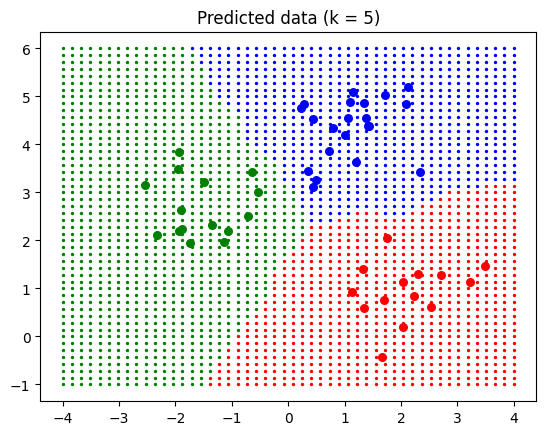

In [17]:
# k=5のときの領域可視化
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0,  # シードを0
    n_features=2,    # 特徴量を2次元
    centers=3,       # 目標を3つ（塊を3つ）
    cluster_std=0.6, # データの標準偏差を0.6
    n_samples=200,   # データ数を200
)

# テストデータが25%に分割する（シードを0，学習データは75%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# k-NNの学習を行う
model = KNeighborsClassifier(n_neighbors=5) # k=5として実行する
model.fit(X_train, y_train)

# 学習後のモデルに対して，特徴量テストデータを適用する
y_pred = model.predict(X_test)

# テストデータをデータフレーム(pandas)に落とし込み，予測されたデータを追加する
pred_data = pd.DataFrame(X_test)
pred_data['target'] = y_pred # ここを変更する

# 目標数でデータを分ける
pred_data1 = pred_data[pred_data['target'] == 0]
pred_data2 = pred_data[pred_data['target'] == 1]
pred_data3 = pred_data[pred_data['target'] == 2]

# 可視化を行う
plt.scatter(pred_data1[0], pred_data1[1], color='b', s=30)
plt.scatter(pred_data2[0], pred_data2[1], color='r', s=30)
plt.scatter(pred_data3[0], pred_data3[1], color='g', s=30)

# 細かくテストデータを分割し，それぞれ予測を行う
# 細かすぎると計算に時間がかかる
newData0 = np.linspace(-4, 4, 50) # 横軸の最小と最大を考慮
newData1 = np.linspace(-1, 6, 50) # 縦軸の最小と最大を考慮

for i in range(len(newData0)):
    for j in range(len(newData1)):
        pred = model.predict([[newData0[i], newData1[j]]])
        if pred[0] == 0:
            plt.scatter([newData0[i]], [newData1[j]], color='b', s=2, marker='o')
        elif pred[0] == 1:
            plt.scatter([newData0[i]], [newData1[j]], color='r', s=2, marker='o')
        else:
            plt.scatter([newData0[i]], [newData1[j]], color='g', s=2, marker='o')

plt.title('Predicted data (k = 5)')
plt.show()

3. k-means（k-平均法）
- 近いものを仲間（同じグループに属している）と考えて，近いもの同士でグループ分けする方法
    1. 各グループの重心から近い点で，グループ分けをやり直す
    2. 各グループの平均値を求めて，その平均値を重心として定義する
        - 重心が変化しなくなるまで，1, 2を繰り返し行うことで，グループ分けを行う
- kはグループの数

- ```from sklearn.cluster import KMeans``` と冒頭に書くことで，k-meansモデルを利用できる
```python
# 使用例
from sklearn.cluster import KMeans

# kを自然数で指定する，n_initで指定した回数分実行し，一番良い結果を採用する
model = KMeans(n_clusters=k, random_state=シード値, n_init=何回実行するか) 

model.fit(X) # 教師なし学習なので，生データを代入する
```

### k-NNとk-meansの違い
- **k-NN: 教師あり学習**
- **k-means: 教師なし学習**

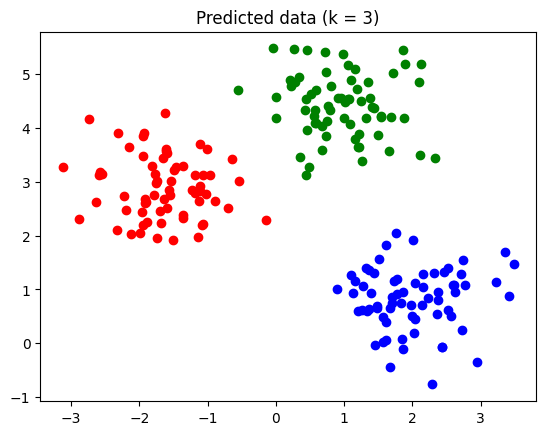

In [18]:
# k-means
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0,  # シードを0
    n_features=2,    # 特徴量を2次元
    centers=3,       # 目標を3つ（塊を3つ）
    cluster_std=0.6, # データの標準偏差を0.6
    n_samples=200,   # データ数を200
)

# Xしか使わない
model = KMeans(n_clusters=3, random_state=0, n_init=10) # k(n_clusters)を自然数で指定する
model.fit(X) # 教師なし学習なので，生データを代入する
y = model.predict(X)

data = pd.DataFrame(X)
data['cluster'] = y

# 目標数でデータを分ける（n_clustersが3なので，3分割する）
cluster1 = data[data['cluster'] == 0]
cluster2 = data[data['cluster'] == 1]
cluster3 = data[data['cluster'] == 2]

# 可視化を行う
plt.scatter(cluster1[0], cluster1[1], color='b')
plt.scatter(cluster2[0], cluster2[1], color='r')
plt.scatter(cluster3[0], cluster3[1], color='g')

plt.title('Predicted data (k = 3)')

plt.show()

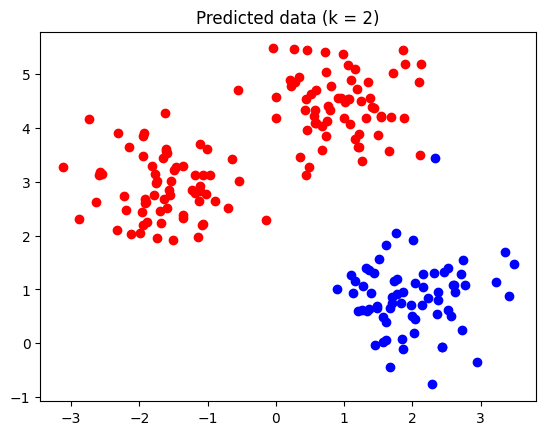

In [19]:
# k-means
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0,  # シードを0
    n_features=2,    # 特徴量を2次元
    centers=3,       # 目標を3つ（塊を3つ）
    cluster_std=0.6, # データの標準偏差を0.6
    n_samples=200,   # データ数を200
)

# Xしか使わない
model = KMeans(n_clusters=2, random_state=0, n_init=10) # k(n_clusters)を自然数で指定する
model.fit(X) # 教師なし学習なので，生データを代入する
y = model.predict(X)

data = pd.DataFrame(X)
data['cluster'] = y

# 目標数でデータを分ける（n_clustersが2なので，2分割する）
cluster1 = data[data['cluster'] == 0]
cluster2 = data[data['cluster'] == 1]

# 可視化を行う
plt.scatter(cluster1[0], cluster1[1], color='b')
plt.scatter(cluster2[0], cluster2[1], color='r')

plt.title('Predicted data (k = 2)')

plt.show()

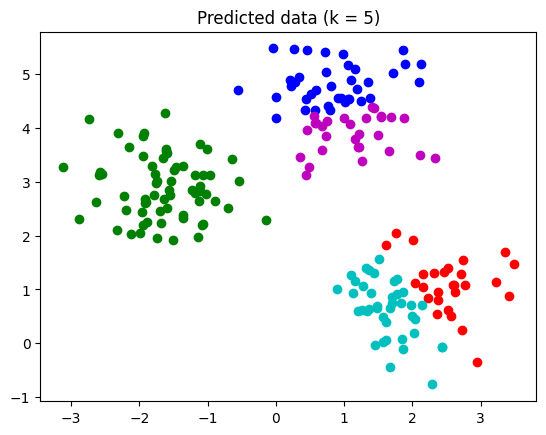

In [20]:
# k-means
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0,  # シードを0
    n_features=2,    # 特徴量を2次元
    centers=3,       # 目標を3つ（塊を3つ）
    cluster_std=0.6, # データの標準偏差を0.6
    n_samples=200,   # データ数を200
)

# Xしか使わない
model = KMeans(n_clusters=5, random_state=0, n_init=10) # k(n_clusters)を自然数で指定する
model.fit(X) # 教師なし学習なので，生データを代入する
y = model.predict(X)

data = pd.DataFrame(X)
data['cluster'] = y

# 目標数でデータを分ける（n_clustersが5なので，5分割する）
cluster1 = data[data['cluster'] == 0]
cluster2 = data[data['cluster'] == 1]
cluster3 = data[data['cluster'] == 2]
cluster4 = data[data['cluster'] == 3]
cluster5 = data[data['cluster'] == 4]

# 可視化を行う
plt.scatter(cluster1[0], cluster1[1], color='b')
plt.scatter(cluster2[0], cluster2[1], color='r')
plt.scatter(cluster3[0], cluster3[1], color='g')
plt.scatter(cluster4[0], cluster4[1], color='m')
plt.scatter(cluster5[0], cluster5[1], color='c')

plt.title('Predicted data (k = 5)')

plt.show()

In [ ]:
# k-means(k = 3のとき)の領域可視化
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0,  # シードを0
    n_features=2,    # 特徴量を2次元
    centers=3,       # 目標を3つ（塊を3つ）
    cluster_std=0.6, # データの標準偏差を0.6
    n_samples=200,   # データ数を200
)

# Xしか使わない
model = KMeans(n_clusters=3, random_state=0, n_init=10) # k(n_clusters)を自然数で指定する
model.fit(X) # 教師なし学習なので，生データを代入する
y = model.predict(X)

data = pd.DataFrame(X)
data['cluster'] = y

# 目標数でデータを分ける
cluster1 = data[data['cluster'] == 0]
cluster2 = data[data['cluster'] == 1]
cluster3 = data[data['cluster'] == 2]

# 可視化を行う
plt.scatter(cluster1[0], cluster1[1], color='b')
plt.scatter(cluster2[0], cluster2[1], color='r')
plt.scatter(cluster3[0], cluster3[1], color='g')

# 細かくテストデータを分割し，それぞれ予測を行う
# 細かすぎると計算に時間がかかる
newData0 = np.linspace(-4, 4, 50) # 横軸の最小と最大を考慮
newData1 = np.linspace(-1, 6, 50) # 縦軸の最小と最大を考慮

for i in range(len(newData0)):
    for j in range(len(newData1)):
        pred = model.predict([[newData0[i], newData1[j]]])
        if pred[0] == 0:
            plt.scatter([newData0[i]], [newData1[j]], color='b', s=2, marker='o')
        elif pred[0] == 1:
            plt.scatter([newData0[i]], [newData1[j]], color='r', s=2, marker='o')
        else:
            plt.scatter([newData0[i]], [newData1[j]], color='g', s=2, marker='o')

plt.title('Predicted data (k = 3)')

plt.show()

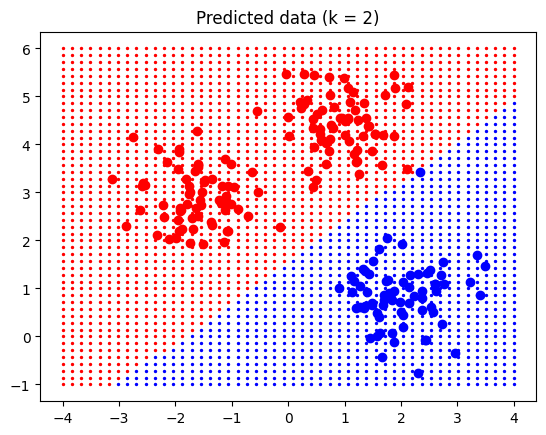

In [13]:
# k-means(k = 2のとき)の領域可視化
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0,  # シードを0
    n_features=2,    # 特徴量を2次元
    centers=3,       # 目標を3つ（塊を3つ）
    cluster_std=0.6, # データの標準偏差を0.6
    n_samples=200,   # データ数を200
)

# Xしか使わない
model = KMeans(n_clusters=2, random_state=0, n_init=10) # k(n_clusters)を自然数で指定する
model.fit(X) # 教師なし学習なので，生データを代入する
y = model.predict(X)

data = pd.DataFrame(X)
data['cluster'] = y

# 目標数でデータを分ける
cluster1 = data[data['cluster'] == 0]
cluster2 = data[data['cluster'] == 1]

# 可視化を行う
plt.scatter(cluster1[0], cluster1[1], color='b')
plt.scatter(cluster2[0], cluster2[1], color='r')

# 細かくテストデータを分割し，それぞれ予測を行う
# 細かすぎると計算に時間がかかる
newData0 = np.linspace(-4, 4, 50) # 横軸の最小と最大を考慮
newData1 = np.linspace(-1, 6, 50) # 縦軸の最小と最大を考慮

for i in range(len(newData0)):
    for j in range(len(newData1)):
        pred = model.predict([[newData0[i], newData1[j]]])
        if pred[0] == 0:
            plt.scatter([newData0[i]], [newData1[j]], color='b', s=2, marker='o')
        else:
            plt.scatter([newData0[i]], [newData1[j]], color='r', s=2, marker='o')

plt.title('Predicted data (k = 2)')

plt.show()

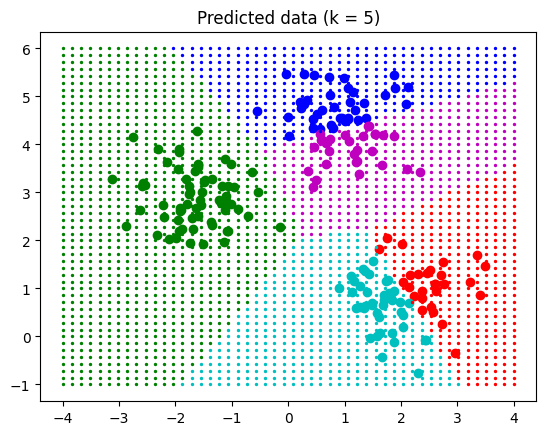

In [14]:
# k-means(k = 5のとき)の領域可視化
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=0,  # シードを0
    n_features=2,    # 特徴量を2次元
    centers=3,       # 目標を3つ（塊を3つ）
    cluster_std=0.6, # データの標準偏差を0.6
    n_samples=200,   # データ数を200
)

# Xしか使わない
model = KMeans(n_clusters=5, random_state=0, n_init=10) # k(n_clusters)を自然数で指定する
model.fit(X) # 教師なし学習なので，生データを代入する
y = model.predict(X)

data = pd.DataFrame(X)
data['cluster'] = y

# 目標数でデータを分ける（n_clustersが5なので，5分割する）
cluster1 = data[data['cluster'] == 0]
cluster2 = data[data['cluster'] == 1]
cluster3 = data[data['cluster'] == 2]
cluster4 = data[data['cluster'] == 3]
cluster5 = data[data['cluster'] == 4]

# 可視化を行う
plt.scatter(cluster1[0], cluster1[1], color='b')
plt.scatter(cluster2[0], cluster2[1], color='r')
plt.scatter(cluster3[0], cluster3[1], color='g')
plt.scatter(cluster4[0], cluster4[1], color='m')
plt.scatter(cluster5[0], cluster5[1], color='c')

# 細かくテストデータを分割し，それぞれ予測を行う
# 細かすぎると計算に時間がかかる
newData0 = np.linspace(-4, 4, 50) # 横軸の最小と最大を考慮
newData1 = np.linspace(-1, 6, 50) # 縦軸の最小と最大を考慮

for i in range(len(newData0)):
    for j in range(len(newData1)):
        pred = model.predict([[newData0[i], newData1[j]]])
        if pred[0] == 0:
            plt.scatter([newData0[i]], [newData1[j]], color='b', s=2, marker='o')
        elif pred[0] == 1:
            plt.scatter([newData0[i]], [newData1[j]], color='r', s=2, marker='o')
        elif pred[0] == 2:
            plt.scatter([newData0[i]], [newData1[j]], color='g', s=2, marker='o')
        elif pred[0] == 3:
            plt.scatter([newData0[i]], [newData1[j]], color='m', s=2, marker='o')
        else:
            plt.scatter([newData0[i]], [newData1[j]], color='c', s=2, marker='o')

plt.title('Predicted data (k = 5)')

plt.show()

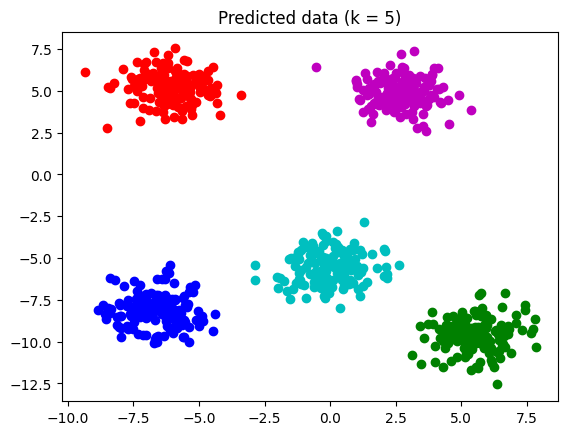

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=10, # シードを10
    n_features=2,    # 特徴量を2次元
    centers=5,       # 目標を5つ（塊を5つ）
    cluster_std=1,   # データの標準偏差を1
    n_samples=700,   # データ数を700
)

# Xしか使わない
model = KMeans(n_clusters=5, random_state=0, n_init=10) # k(n_clusters)を自然数で指定する
model.fit(X) # 教師なし学習なので，生データを代入する
y = model.predict(X)

data = pd.DataFrame(X)
data['cluster'] = y

# 目標数でデータを分ける（n_clustersが5なので，5分割する）
cluster1 = data[data['cluster'] == 0]
cluster2 = data[data['cluster'] == 1]
cluster3 = data[data['cluster'] == 2]
cluster4 = data[data['cluster'] == 3]
cluster5 = data[data['cluster'] == 4]

# 可視化を行う
plt.scatter(cluster1[0], cluster1[1], color='b')
plt.scatter(cluster2[0], cluster2[1], color='r')
plt.scatter(cluster3[0], cluster3[1], color='g')
plt.scatter(cluster4[0], cluster4[1], color='m')
plt.scatter(cluster5[0], cluster5[1], color='c')

plt.title('Predicted data (k = 5)')

plt.show()

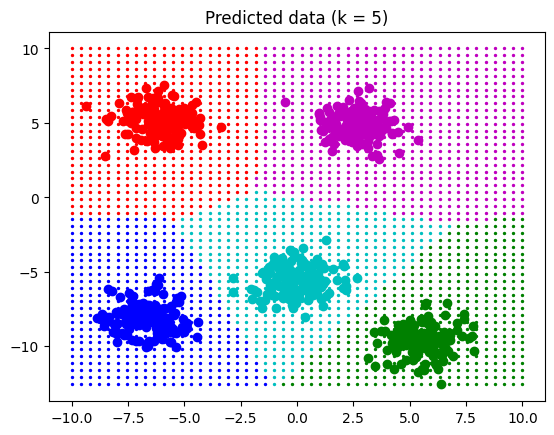

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ステップ1
# 塊分布の自作データの作成
X, y = make_blobs(
    random_state=10, # シードを10
    n_features=2,    # 特徴量を2次元
    centers=5,       # 目標を5つ（塊を5つ）
    cluster_std=1,   # データの標準偏差を1
    n_samples=700,   # データ数を700
)

# Xしか使わない
model = KMeans(n_clusters=5, random_state=0, n_init=10) # k(n_clusters)を自然数で指定する
model.fit(X) # 教師なし学習なので，生データを代入する
y = model.predict(X)

data = pd.DataFrame(X)
data['cluster'] = y

# 目標数でデータを分ける（n_clustersが5なので，5分割する）
cluster1 = data[data['cluster'] == 0]
cluster2 = data[data['cluster'] == 1]
cluster3 = data[data['cluster'] == 2]
cluster4 = data[data['cluster'] == 3]
cluster5 = data[data['cluster'] == 4]

# 可視化を行う
plt.scatter(cluster1[0], cluster1[1], color='b')
plt.scatter(cluster2[0], cluster2[1], color='r')
plt.scatter(cluster3[0], cluster3[1], color='g')
plt.scatter(cluster4[0], cluster4[1], color='m')
plt.scatter(cluster5[0], cluster5[1], color='c')

# 細かくテストデータを分割し，それぞれ予測を行う
# 細かすぎると計算に時間がかかる
newData0 = np.linspace(-10, 10, 50) # 横軸の最小と最大を考慮
newData1 = np.linspace(-12.5, 10, 50) # 縦軸の最小と最大を考慮

for i in range(len(newData0)):
    for j in range(len(newData1)):
        pred = model.predict([[newData0[i], newData1[j]]])
        if pred[0] == 0:
            plt.scatter([newData0[i]], [newData1[j]], color='b', s=2, marker='o')
        elif pred[0] == 1:
            plt.scatter([newData0[i]], [newData1[j]], color='r', s=2, marker='o')
        elif pred[0] == 2:
            plt.scatter([newData0[i]], [newData1[j]], color='g', s=2, marker='o')
        elif pred[0] == 3:
            plt.scatter([newData0[i]], [newData1[j]], color='m', s=2, marker='o')
        else:
            plt.scatter([newData0[i]], [newData1[j]], color='c', s=2, marker='o')

plt.title('Predicted data (k = 5)')

plt.show()